# Aula 4 - pandas

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Manipulação de DataFrames (concat, merge, apply, groupby)
- 2) Métodos úteis (drop, rename, sort_values, sort_index, reset_index, max, min, mean, median, sum, cumsum, quantile, describe, value_counts, unique, nunique)
- 3) Limpeza de Dados (dropna, fillna, isnull, notnull, replace, duplicated, drop_duplicated)

_______

### Objetivos

Apresentar o pandas, frisando sua importância para o processamento de dados e em data science. Apresentar seus principais conceitos (Series, DataFrame) e funcionalidades (leitura de arquivo, filtros, seleção, apply, escrita de arquivos, etc.)

### Habilidades a serem desenvolvidas nessa aula

Ao final da aula o aluno deve:

- Saber como concatenar dataframes,
- Conseguir agrupar os dados e aplicar vários métodos à eles
- Aprender a limpar uma base de dados.

____
____
____

## Titanic

O arquivo que usaremos hoje é relativo ao Titanic! Essa é uma das bases mais famosas de ciência de dados. Você pode saber mais sobre estes dados [clicando aqui!](https://www.kaggle.com/c/titanic)

In [ ]:
import pandas as pd

In [ ]:
# lê dataframe do arquivo titanic.csv 
df = pd.read_csv("data/titanic.csv")
df

Agora que temos uma base mais complexa, vamos aproveitar para ver agora algumas outras funcionalidades do Pandas!

### Métodos
O pandas possui alguns métodos para entendermos melhor a estrutura dos dados:

#### .describe()

In [ ]:
# .describe(include='all') descreve estatísticas básicas sobre as colunas
# repare que nesse caso o próprio pandas fez o trabalho de reconhecer quais colunas são as numéricas
df.describe(include='all')

#### .info()
.info() fornece a quantidade de valores não nulos e o tipo de cada coluna

In [ ]:
df.info()

#### .value_counts()
`.value_counts()` traz a contagem de elementos pra cada valor distinto da coluna em que está sendo aplicado.

In [ ]:
df.Pclass.value_counts()

#### .unique()
retorna quem são os valores únicos da sua coluna. Equivalente ao DISTINCT column no SQL

In [ ]:
df.Embarked.unique()

#### nunique()
retorna a quantidade de valores únicos da sua coluna. Equivalente ao COUNT (DISTINCT column) no SQL

In [ ]:
df.Embarked.nunique()

#### .rename()
Você consegue renomear tanto o nome das colunas quanto o índice (axis='index').

In [ ]:
# vamos criar uma cópia do df
df_copy = df.copy()
df_copy.rename({'Age':'Idade', 'Name':'Nome'}, axis=1, inplace=True)
df_copy.head()

#### .drop()
Permite deletar linhas ou colunas inteiras dependendo do parâmetro `axis`. É um dos métodos que aceita o parâmetro `inplace`.

In [ ]:
df_copy.drop(['Nome','Idade'], axis=1)

In [ ]:
df_copy.drop([0,1])

#### .sort_values()
Como diz o nome, o método é utilizado para ordenar os dados baseado em uma ou mais colunas. Para retornar a ordem reversa utilize o argumento `ascending=True`. É um dos métodos que aceita o parâmetro `inplace`.

In [ ]:
df.sort_values(['Pclass','Fare'], ascending=True)

In [ ]:
df.sort_values(['Pclass','Fare'], ascending=[True, False])

## Limpeza de dados

#### .isna() e isnull()
retorna um df booleano indicando se existe um nulo naquela posição. `pd.isnull()` é um alias para `pd.isna()` dentro do python como podemos ver na <a href="https://github.com/pandas-dev/pandas/blob/0409521665bd436a10aea7e06336066bf07ff057/pandas/core/dtypes/missing.py#L109">documentação</a>. O pandas dataframe é baseado nos df do R, onde null e na tem sentidos distintos.

In [ ]:
pd.isnull

In [ ]:
df.isna()

Para termos a quantidade de nans em cada coluna podemos somar os valores true:

In [ ]:
df.isna().sum()

#### .notnull()
retorna df com True ou False, com True para elementos não nulos

In [ ]:
df.notnull().sum()

#### .dropna()
elimina nulos em todo o df ou em colunas especificadas. É um dos métodos que aceita o parâmetro `inplace`.

In [ ]:
df.dropna(subset=['Age','Embarked'])

In [ ]:
df.dropna(subset=['Age','Embarked']).isna().sum()

É possível utilizar o pandas para fazer **agrupar dados**:

#### .fillna()
preeche os valores nulos com valores especificados. <br>
Parâmetros úteis:
* __method__ {‘bfill’,‘ffill’, None}, default None <br>
    Preenche os nas propagando o último valor válido para frente (ffill) ou utiliza próxima observação válida para preencher os nulos (bfill).
* __axis__ {0 para ‘index’, 1 para ‘colunas’} <br>
    Eixo no qual se quer preencher os nulos
* __inplace__ {booleano}, default False



Quais soluções poderíamos utilizar para preencher os nulos em Age? <br>
E as cabines nulas? <br>
E os portões de embarque nulos? <br>
Qual os possíveis problemas que podemos encontrar utilizando essas abordagens?

In [ ]:
# Podemos ordenar nosso df pelo Pclass e Fare para preencher os nulos de Embarked 
# utilizando o ffill se aceitarmos a premissa de que os portões de embarque eram
# distintas de acordo com o nível social. 
# Qual problema poderíamos estar causando nos nossos dados?
df.sort_values(['Pclass', 'Fare']).fillna(method='ffill')

#### .replace()
substitui elementos dentro do df.  É um dos métodos que aceita o parâmetro `inplace`.


In [ ]:
# para apenas uma troca
df.replace('male', 'H')

In [ ]:
# para mais de uma troca
df.replace(['male', 'female'], ['H', 'M'])

#### .duplicated()  e .drop_duplicated()
O `.duplicated()` retorna uma series indicando se determinada linha possui duplicados ou não. Já o `.drop_duplicated()`, elimina as linhas duplicadas. <br>
Parametros do `.drop_duplicated()`: <br>

    * subset
        seleciona colunas para serem utilizdas na comparação de linhas duplicadas
    * keep{‘first’, ‘last’, False}, default ‘first’
        Determina qual duplicado manter
    * inplace - bool, default False
        Se False retorna uma cópia do df com as alterações, es True faz as modificações no próprio df


In [ ]:
# vamos criar um df que possua linhas duplicadas
df_dup = df.copy()

df_dup.loc[891, :] = df_dup.loc[0, :]
                                
df_dup.loc[892, :] = df_dup.loc[1, :]
df_dup.loc[893, :] = df_dup.loc[1, :]

print(df.shape, df_dup.shape)

In [ ]:
df_dup.duplicated().sum()

In [ ]:
df_dup.duplicated()

In [ ]:
print(df_dup.shape)
print(df_dup.drop_duplicates().shape)

### Groupby
Assim como no SQL, no pandas também temos um método com o qual podemos agregar os dados. O `groupby` primeiro separa nossos dados em grupos definidos dentro do método,  aplicar um tipo de operação usando agregação, transformação, filtragem ou até uma função própria e, por fim, juntar os resultados encontrados.
<br>

<img src="groupby.png"  style="width: 700px" >
Exemplo de aplicação da função de agregação `mean`
<br><br><br>

Utilizar o `groupby` é o mesmo que fazer a sequência:

    Dividir os dados em grupos utilizando um critério
    
    Aplicar uma função em cada um dos grupos separadamente
    
    Combinar o resultado em uma estrutura de dados

#### Funções de agregação
Com essas funções podemos aplicar operações estatísticas nos nossos dados. Exemplos:<br>
`mean`, `std`, `max`, `min`, `count`, `sum`, `var`. <br>
Quando queremos aplicar apenas uma dessas operações podemos chamá-las diretamente após o `groupby`:


In [ ]:
# FUNÇÃO DE AGREGAÇÃO mean()
df.groupby(["Pclass", "Sex"]).mean()

Aqui agregamos os dados por Pclass e Sex e em todas as colunas numéricas foi calculada a média. Se quiséssemos a média de apenas uma coluna poderíamos adicioná-la ao final da nossa sentença:

In [ ]:
# Queremos apenas a média de idade considerando a classe e o sexo
df.groupby(["Pclass", "Sex"]).mean()[['Age']]

Ou de modo mais eficiente:

In [ ]:
df.groupby(["Pclass", "Sex"])[['Age']].mean()

Note que `df.groupby('A').colname.mean()` é mais eficiente que `df.groupby('A').mean().colname` pois a agregação só será realizada na coluna de interesse (colname).

Quando queremos aplicar mais de uma operação chamamos o método `.agg()`

In [ ]:
df.groupby(["Pclass"]).agg(['mean','max','min'])

Para operações distintas em colunas distintas passamos um dicionário com o nome da coluna como chave e a operação como valor

In [ ]:
import numpy as np
df.groupby(['Pclass']).agg({'Embarked':pd.Series.mode,'Fare':np.mean})

Se quisermos que o df de saída tenha nomes específicos devemos seguir o padrão:

In [ ]:
df.groupby(['Pclass']).agg(mode_embarked=('Embarked',pd.Series.mode), mean_fare=('Fare',np.mean))

Reparem que a coluna utilizada no `groupby` virou um index do nosso df. Para convertê-la em coluna novamente temos duas formas: <br>
  1. chamar o parâmetro `as_index=False` dentro do `groupby`
  2. aplicar `.reset_index()` ao final da sentença

In [ ]:
# exemplo com as_index = False
df.groupby(['Pclass'], as_index=False).agg(mode_embarked=('Embarked',pd.Series.mode),mean_fare=('Fare',np.mean))

In [ ]:
# exemplo com .reset_index()
df.groupby(['Pclass']).agg(mode_embarked=('Embarked',pd.Series.mode),mean_fare=('Fare',np.mean)).reset_index()

E se quisessemos criar uma coluna nova que contenham o valor médio do Fare por Pclass?

In [ ]:
df.groupby('Pclass')[["Fare"]].mean()

Queremos que todos da primeira classe tenham o valor 84.15 nessa nova coluna, todes da segunda classe tenham o valor 20.66 e da terceira classe 13.67. <br>
Podemos tentar:

In [ ]:
df["Fare_Mean"] = df.groupby('Pclass')["Fare"].mean()

In [ ]:
df.head(10)

Xiiii... deu ruim...
<br>
<br>
Como poderíamos resolver utilizando o `groupby().agg()`?

#### Transformação dos dados
Ao aplicarmos o método `.transform()` temos como retorno um objeto com o mesmo index do df de origem contendo a a tranformação realizada para cada uma das linhas. Dessa forma podemos utilizar esse método e apenas criar uma coluna nova no nosso df.
<br>

Ele será muito **útil na criação de novas features** para os modelos.

In [ ]:
df.groupby('Pclass')[["Fare"]].transform('mean')

In [ ]:
df["Fare_Mean"] = df.groupby('Pclass')["Fare"].transform('mean')
df.head(10)

Podemos aplicar tanto as operações mencionadas na agregação quanto uma função `lambda`:

In [ ]:
df['variacao_max_min'] = df.groupby('Pclass')[["Fare"]].transform(lambda x: x.max() - x.min())
df.head(10)

Também podemos preencher os valores nulos com a média de cada grupo

In [ ]:
# verificando quantidade de nulos por coluna
df.isna().sum()

Para preencher os nulos utilizaremos o método `.fillna()` que veremos mais ainda hoje

In [ ]:
df['Age_sem_nulo'] = df.groupby(['Pclass'])[['Age']].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isna().sum()

In [ ]:
# Conferindo o preenchimento de nulos
# idade média por Pclass
df.groupby(['Pclass'])[['Age']].mean()

In [ ]:
# selecionando a parte do df que tem idade nula
df[df.Age.isna()].head(10)

#### Apply
O método `.apply()` recebe uma função como input e aplica ela para todo o df como se fosse um loop. Se você quiser que essa função seja aplicada nas colunas deve considerar axis=0 e nas linhas axis=1)

In [ ]:
df.groupby(['Pclass']).apply(lambda x: x.describe())

#### Transform X Apply
Com o `.transform()` podemos manipular **apenas uma coluna ou linha**, dependendo do parâmetro `axis`. Com o `.apply()` podemos manipular **várias colunas ou linhas** ao mesmo tempo.

## Cruzamento e concatenação de bases

Também é possível fazer **cruzamento de bases** com o pandas. 

Pra quem conhece SQL: esses são os joins!

Pra quem conhece Excel: essa é uma forma de fazer o procv!

Vamos supor que temos as notas de duas provas dos alunos separas em sheets diferentes do excel e queremos juntar essa notas em um único df.

In [ ]:
# ler os dados de diferentes sheets do mesmo excel "notas.xlsx"
import pandas as pd

df1 = pd.read_excel("notas.xlsx", sheet_name="notas1")
df2 = pd.read_excel("notas.xlsx", sheet_name="notas2")

In [ ]:
df1

In [ ]:
df2

Repare que temos alunos distintos nos dois df

Diferentes tipos de join

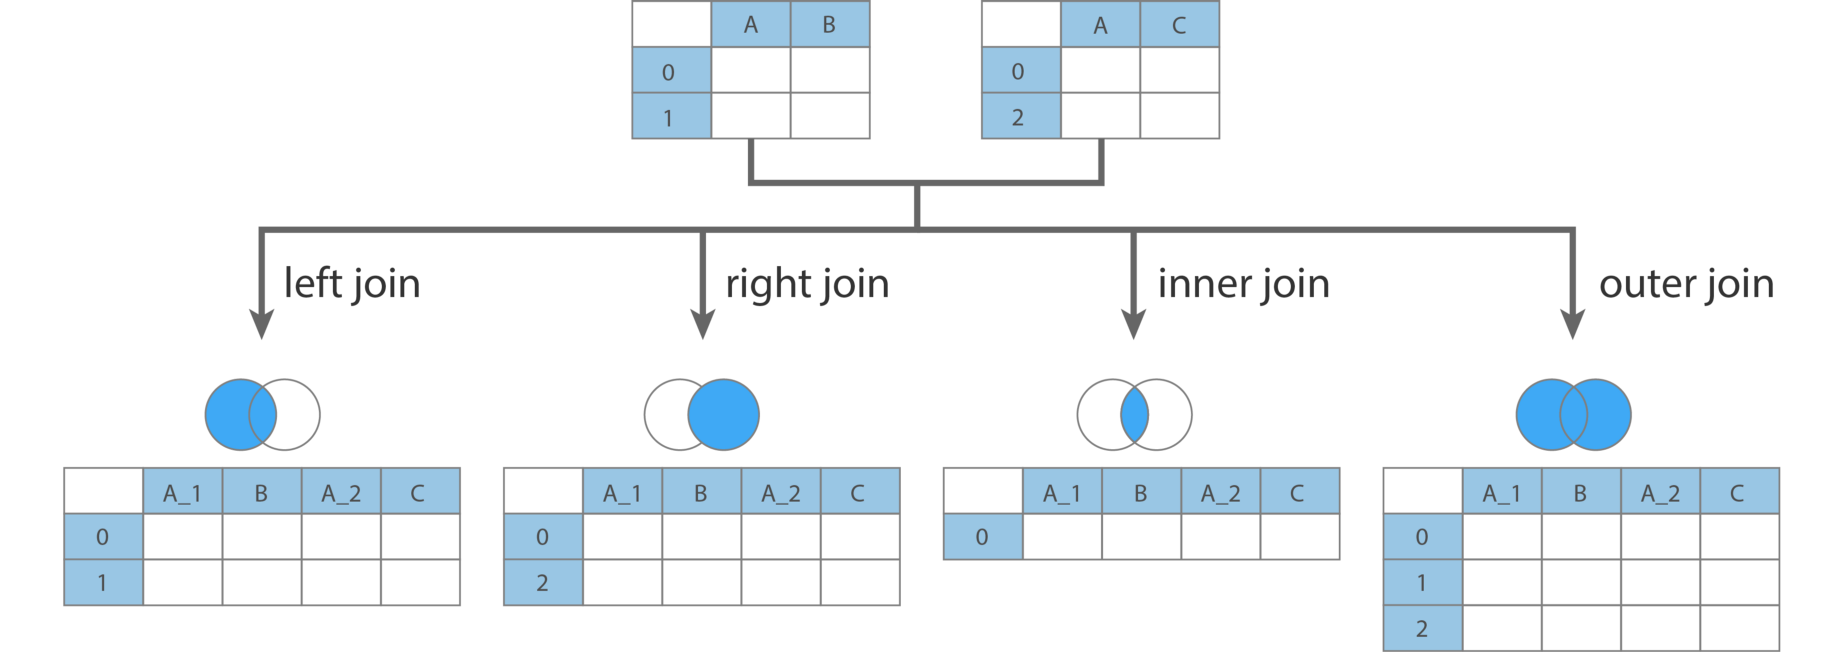
Fonte: https://towardsdatascience.com/python-pandas-dataframe-join-merge-and-concatenate-84985c29ef78

O pandas possui dois métodos específicos para trabalharmos com o join de colunas entre df: `.merge()` e `.join()`. O `.merge()` fornece mais flexibilidade de trabalho e iremos utilizar e ele.

### pd.merge()
pd.merge(
    left,
    right,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y")
)

In [ ]:
df_junto = df1.merge(df2, how='outer')

df_junto.sort_values("prova2", ascending=False)

In [ ]:
df1.merge(df2, how="outer", on="RA")

In [ ]:
df1.merge(df2, how="outer", on=["RA", "aluno"])

### pd.concat()
Diferente do `.merge()` e `.join()` que operam apenas com colunas, com o `.concat()` podemos especificar se queremos concatenar em linhas ou colunas.
Na concatenação de colunas o `.concat()` considerando o index dos df e não podemos especificar colunas.

pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)


In [ ]:
pd.concat([df1, df2], axis=1, join="inner")

Repare que ao concatenar diretamente pelo index ele juntou o aluno obi wan com o anakin. Para tirar esse erro podemos utilizar `ignore_index=True` e tirar o `axis=1`.

In [ ]:
pd.concat([df1, df2], join="outer", ignore_index=True)

Ao concatenar dois df nas linhas, o `.concat()` irá considerar o nome das colunas. Se temos colunas com nomes distintos e utilizamos o parâmetro join='inner', ele irá ignorar essas colunas: 

In [ ]:
pd.concat([df1, df2], axis=0, join="inner")

## Exercícios

1. Considere a existência de três tabelas distintas:
* customer.csv : Possui a informação dos clientes em duas colunas: customer id  customer name
* products.csv : Conté informação dos produtos vendidos pela empresa em três colunas - p_id (product id), product (name) e price
* sales.csv : Contém informações das vendas realizadas em seis colunas - sale_id, c_id (customer id), p_id (product_id), qty (quantity sold), store (name)

Conhecendo as bases responda:

a) Quais foram os produtos vendidos? 


b) E os não vendidos?

c) Quantos clientes não realizaram uma compra? 

d) Liste a quantidade vendida e o faturamento de cada produto 

e) Liste a quantidade vendida de cada produto por loja

f) Qual loja teve maior faturamento?

g) Qual produto foi o mais vendido?

## Referências
https://pandas.pydata.org/docs/user_guide/groupby.html
https://pandas.pydata.org/docs/user_guide/merging.html
https://towardsdatascience.com/python-pandas-dataframe-join-merge-and-concatenate-84985c29ef78

## Material extra

### Outros parâmetros do groupby por default
* as_index
* sort
* dropna # exclui nans nas keys

<br> Em todas o default do python é True <br>
df.groupby('Pclass', sort=False)["Fare"].mean()

In [ ]:
# dropna
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])
df_dropna

In [ ]:
# Default ``dropna`` is set to True, which will exclude NaNs in keys
df_dropna.groupby(by=["b"], dropna=True).sum()

In [ ]:
df_dropna.groupby(by=["b"], dropna=False).sum()

Repare que podemos chamar qualquer função do `pd.Series` ou  do `numpy`

In [ ]:
df.groupby(["Survived"]).mean()

Uma grande funcionalidade do pandas é o método `apply()`, utilizado para aplicar uma **função** (muitas vezes, uma **função lambda**) a uma coluna ou linha de um DataFrame

Uma função lambda nada mais é que uma **forma alternativa de declarar uma função**, de um jeito mais direto

In [ ]:
# função que retorna o dobro de um número usando def
def dobro(x):
    
    return 2*x

dobro(2)

In [ ]:
# função que retorna o dobro de um número usando lambda x
faz_dobro = lambda x: 2*x

In [ ]:
faz_dobro(6)

Vamos selecionar a coluna de idades...

In [ ]:
df["Age"]

Aplicando uma função lambda **a todos os elementos da coluna**, ou seja, **à todas as linhas da tabela, daquela coluna específica**:

Tomando cada idade + 2, usando a função lambda definida.

Essa função lambda é equivalente a:

```python

def funcao(x)

    return x + 2
```

In [ ]:
df["Age"].apply(lambda x: x + 2)

Um outro exemplo:

In [ ]:
# função: transforma todos os números em string, e concatena "!!!!!!!!!" à string
df["Age"].apply(lambda x: str(x) + "!!!!!!!!!")

Vamos usar uma função lambda para **extrair o sobrenome** dos nomes dos passageiros

Pra extrarir o sobrenome, note que este está separada do resto do nome por vírgula.

Para perceber isso, dê uma olhada na coluna de nomes:

In [ ]:
df["Name"]

Portanto, podemos usar a função para strings `split(",")`, com quebra na vírgula, e depois selecionar o primeiro elemento da lista gerada!

Vamos aproveitar e **criar uma nova coluna da base**, com os sobrenomes!

In [ ]:
df["Surname"] = df["Name"].apply(lambda x: x.split(",")[0])

In [ ]:
df["Surname"]

#### Filtros
O filtro retorna apenas um subset do nosso df. Aqui podemos aplicar filtros mais elaborados do que os vistos na última aula. <br>
Podemos, por exemplo, eliminar categorias do df que possuem apenas alguns elementos:

In [ ]:
df.SibSp.value_counts()

In [ ]:
df.shape

In [ ]:
def filter_func(x):
    return x['Fare'] - x.Fare_Mean < 100

# df_filter = df.groupby(['SibSp']).filter(lambda x: filter_func(x))

df_filter = df.groupby(['SibSp']).filter(lambda x: len(x) >20)
df_filter.shape

In [ ]:
df_filter.SibSp.value_counts()

Vamos supor que antes de afundar o titanic, o time de hapiness quisesse promover uma jogatina para os grupos (segmentado por classe e sexo) que possuem idade média acima de 30 anos.

In [ ]:
df.groupby(['Pclass','Sex'])[['Age']].mean()

como podemos filtrar nosso df para termos apenas os passageiros que pertecem a essas segmentações escolhidas?

In [ ]:
df.groupby(['Pclass','Sex']).filter(lambda x: x['Age'].mean()>30)

### Apply

E se quisessemos comparar o quanto cada passageiro pagou a mais ou a menos da média do Fare?

In [ ]:
def f(group):
    return pd.DataFrame({'Fare_original': group,
                         'Fare_variacao': group - group.mean()})

df[['Fare_original','Fare_variacao']] = df.groupby('Pclass')['Fare'].apply(f)

In [ ]:
df.head()